In [1]:
#Dependencies
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from numpy import array
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
#Read Data
CSCO = pd.read_csv("CSCO.csv", date_parser=True)
CSCO

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-16,26.070000,27.000000,26.059999,26.790001,22.808805,44949600
1,2015-11-17,26.799999,27.270000,26.680000,26.809999,22.825829,30490200
2,2015-11-18,27.000000,27.160000,26.730000,27.120001,23.089760,27015700
3,2015-11-19,27.100000,27.650000,27.049999,27.370001,23.302610,27417400
4,2015-11-20,27.590000,27.780001,27.459999,27.570000,23.472891,26502800
...,...,...,...,...,...,...,...
1254,2020-11-09,39.919998,40.230000,38.119999,38.200001,38.200001,42649500
1255,2020-11-10,38.209999,39.029999,38.169998,38.720001,38.720001,31514500
1256,2020-11-11,39.009998,39.450001,38.439999,39.330002,39.330002,27332800
1257,2020-11-12,38.980000,39.389999,38.400002,38.669998,38.669998,29368300


In [3]:
#Change paramters
cut_off_date = "2019-1-1"
x_train_days = 120
num_epochs = 50
num_batch = 32
data_dim = 1
units1=50
units2=50

In [4]:
#Create Training Set based of date selected
CSCO_train_ = CSCO[CSCO["Date"]<cut_off_date].copy()
CSCO_train_

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-16,26.070000,27.000000,26.059999,26.790001,22.808805,44949600
1,2015-11-17,26.799999,27.270000,26.680000,26.809999,22.825829,30490200
2,2015-11-18,27.000000,27.160000,26.730000,27.120001,23.089760,27015700
3,2015-11-19,27.100000,27.650000,27.049999,27.370001,23.302610,27417400
4,2015-11-20,27.590000,27.780001,27.459999,27.570000,23.472891,26502800
...,...,...,...,...,...,...,...
969,2019-09-24,49.750000,50.200001,48.930000,49.119999,47.131035,26717200
970,2019-09-25,49.049999,49.770000,48.580002,49.610001,47.601196,14013500
971,2019-09-26,49.430000,49.490002,48.259998,48.830002,46.852776,20172900
972,2019-09-27,49.000000,49.470001,48.599998,48.840000,46.862373,16065300


In [5]:
#Create testing set
CSCO_test = CSCO[CSCO["Date"]>cut_off_date].copy()
CSCO_test

,Date,Open,High,Low,Close,Adj Close,Volume
974,2019-10-01,49.650002,49.869999,47.360001,47.740002,45.806919,24185600
975,2019-10-02,47.349998,47.380001,46.009998,46.560001,44.674698,30722400
976,2019-10-03,46.320000,47.080002,45.700001,47.060001,45.496452,15915500
977,2019-10-04,47.250000,47.630001,46.950001,47.520000,45.941166,16718800
978,2019-10-07,47.470001,48.130001,47.320000,47.770000,46.182861,14625200
...,...,...,...,...,...,...,...
1254,2020-11-09,39.919998,40.230000,38.119999,38.200001,38.200001,42649500
1255,2020-11-10,38.209999,39.029999,38.169998,38.720001,38.720001,31514500
1256,2020-11-11,39.009998,39.450001,38.439999,39.330002,39.330002,27332800
1257,2020-11-12,38.980000,39.389999,38.400002,38.669998,38.669998,29368300


In [6]:
#Delete Unnessary Columns
train_CSCO=CSCO_train_.drop(["Date","Adj Close","Volume","High", "Low", "Close"], axis = 1)
train_CSCO.head()

,Open
0,26.070000
1,26.799999
2,27.000000
3,27.100000
4,27.590000


In [7]:
#Scale Data
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
CSCO_train = scalar.fit_transform(train_CSCO)
CSCO_train

array([[9.76639432e-02],
       [1.18209932e-01],
       [1.23839006e-01],
       [1.26653529e-01],
       [1.40444691e-01],
       [1.42133404e-01],
       [1.30875313e-01],
       [1.32845479e-01],
       [1.30875313e-01],
       [1.33408384e-01],
       [1.29468080e-01],
       [1.37630168e-01],
       [1.41570472e-01],
       [1.22431773e-01],
       [1.39600306e-01],
       [1.28623695e-01],
       [1.22713169e-01],
       [1.16521246e-01],
       [1.09484939e-01],
       [1.04137318e-01],
       [1.15958314e-01],
       [1.23839006e-01],
       [1.32001150e-01],
       [1.12580914e-01],
       [1.12018010e-01],
       [1.19617222e-01],
       [1.24964843e-01],
       [1.35378550e-01],
       [1.32282546e-01],
       [1.36222935e-01],
       [1.42414857e-01],
       [1.34534165e-01],
       [1.06670388e-01],
       [1.10892229e-01],
       [9.79453955e-02],
       [8.13397106e-02],
       [8.30283962e-02],
       [6.55783826e-02],
       [8.19026152e-02],
       [7.93695446e-02],


In [8]:
X_train = []
y_train = []

In [9]:
CSCO_train.shape[0]

974

In [10]:
# Number of days of training data into X train and rest of data into Y train
for i in range (x_train_days,CSCO_train.shape[0]):
    X_train.append(CSCO_train[i-x_train_days:i])
    y_train.append(CSCO_train[i, 0])

In [11]:
#Create Arrays and show shape
X_train, y_train  = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((854, 120, 1), (854,))

In [12]:
#Create Model
model = Sequential()

model.add(LSTM(units=units1, activation="relu", return_sequences= True, input_shape=(X_train.shape[1],data_dim)))
model.add(Dropout(0.2))

#model.add(LSTM(units=50, activation="relu", return_sequences= True))
#model.add(Dropout(0.2))

#model.add(LSTM(units=50, activation="relu", return_sequences= True))
#model.add(Dropout(0.2))

model.add(LSTM(units=units2, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1))

In [13]:
#Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 120, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Compile Model
model.compile(optimizer="adam", loss="mean_squared_error")

In [15]:
model.fit(X_train, y_train, epochs=num_epochs, batch_size=num_batch)

Train on 854 samples
Epoch 1/50
854/854 [==============================] - 23s 27ms/sample - loss: 0.1065
Epoch 2/50
854/854 [==============================] - 15s 18ms/sample - loss: 0.0128
Epoch 3/50
854/854 [==============================] - 17s 20ms/sample - loss: 0.0084
Epoch 4/50
854/854 [==============================] - 14s 17ms/sample - loss: 0.0080
Epoch 5/50
854/854 [==============================] - 14s 17ms/sample - loss: 0.0070
Epoch 6/50
854/854 [==============================] - 14s 16ms/sample - loss: 0.0064
Epoch 7/50
854/854 [==============================] - 16s 19ms/sample - loss: 0.0061
Epoch 8/50
854/854 [==============================] - 14s 16ms/sample - loss: 0.0060
Epoch 9/50
854/854 [==============================] - 15s 17ms/sample - loss: 0.0055
Epoch 10/50
854/854 [==============================] - 14s 17ms/sample - loss: 0.0063
Epoch 11/50
854/854 [==============================] - 15s 18ms/sample - loss: 0.0066
Epoch 12/50
854/854 [=====================

In [16]:
#Add training data to test data
past_days = train_CSCO.tail(x_train_days)

In [17]:
CSCO_predict = past_days.append(CSCO_test, ignore_index = True)

In [18]:
CSCO_predict

,Open,Date,High,Low,Close,Adj Close,Volume
0,55.110001,NaN,NaN,NaN,NaN,NaN,NaN
1,55.930000,NaN,NaN,NaN,NaN,NaN,NaN
2,55.930000,NaN,NaN,NaN,NaN,NaN,NaN
3,56.400002,NaN,NaN,NaN,NaN,NaN,NaN
4,56.619999,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
400,39.919998,2020-11-09,40.230000,38.119999,38.200001,38.200001,42649500.0
401,38.209999,2020-11-10,39.029999,38.169998,38.720001,38.720001,31514500.0
402,39.009998,2020-11-11,39.450001,38.439999,39.330002,39.330002,27332800.0
403,38.980000,2020-11-12,39.389999,38.400002,38.669998,38.669998,29368300.0


In [19]:
#Drop unnessary rows
CSCO_predict=CSCO_predict.drop(["Date","Adj Close","Volume","High", "Low", "Close"], axis =1)

In [20]:
#Transform data
inputs = scalar.transform(CSCO_predict)

In [21]:
inputs.shape

(405, 1)

In [22]:
#Create X_test data with number of days and the rest into Y test
X_test = []
y_test = []

for i in range(x_train_days, inputs.shape[0]):
    X_test.append(inputs[i-x_train_days:i])
    y_test.append(inputs[i, 0])

In [23]:
#Show shape
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((285, 120, 1), (285,))

In [24]:
#make predictions
predictions=model.predict(X_test)

In [25]:
real_predictions = scalar.inverse_transform(predictions)
CSCO_test['Date']= pd.to_datetime(CSCO_test['Date'])

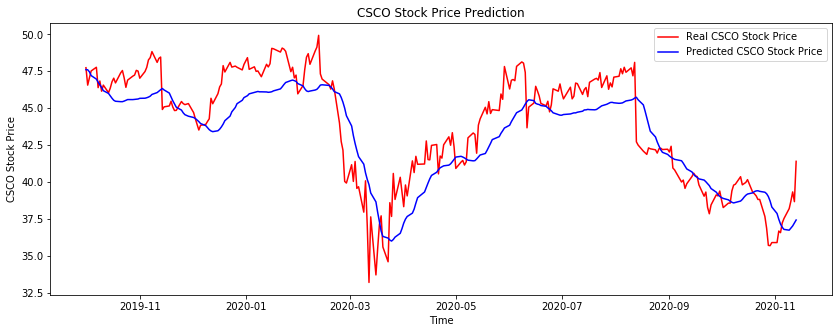

In [47]:
plt.figure(figsize=(14,5))
plt.plot(CSCO_test["Date"],CSCO_test["Close"], color = 'red', label = 'Real CSCO Stock Price')
plt.plot(CSCO_test["Date"],real_predictions, color = 'blue', label = 'Predicted CSCO Stock Price')
plt.title('CSCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CSCO Stock Price')
plt.legend()
plt.savefig('Unadjusted')

In [27]:
CSCO_test

,Date,Open,High,Low,Close,Adj Close,Volume
974,2019-10-01,49.650002,49.869999,47.360001,47.740002,45.806919,24185600
975,2019-10-02,47.349998,47.380001,46.009998,46.560001,44.674698,30722400
976,2019-10-03,46.320000,47.080002,45.700001,47.060001,45.496452,15915500
977,2019-10-04,47.250000,47.630001,46.950001,47.520000,45.941166,16718800
978,2019-10-07,47.470001,48.130001,47.320000,47.770000,46.182861,14625200
...,...,...,...,...,...,...,...
1254,2020-11-09,39.919998,40.230000,38.119999,38.200001,38.200001,42649500
1255,2020-11-10,38.209999,39.029999,38.169998,38.720001,38.720001,31514500
1256,2020-11-11,39.009998,39.450001,38.439999,39.330002,39.330002,27332800
1257,2020-11-12,38.980000,39.389999,38.400002,38.669998,38.669998,29368300


In [28]:
import datetime
adjustment = datetime.timedelta(days=7)
CSCO_test['Date']= pd.to_datetime(CSCO_test['Date'])
CSCO_test["Adj Date"] = CSCO_test["Date"]- adjustment

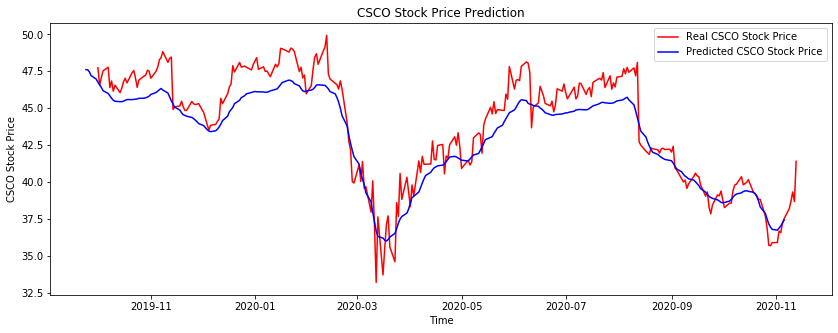

In [46]:
plt.figure(figsize=(14,5))
plt.plot(CSCO_test["Date"],CSCO_test["Close"], color = 'red', label = 'Real CSCO Stock Price')
plt.plot(CSCO_test["Adj Date"],real_predictions, color = 'blue', label = 'Predicted CSCO Stock Price')
plt.title('CSCO Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('CSCO Stock Price')
plt.legend()
plt.savefig('Adjusted')

In [36]:
CSCO_data_= CSCO_test.copy()

In [38]:
CSCO_data=CSCO_data_.drop(["Open","High","Low", "Adj Close","Volume"], axis = 1) 

In [39]:
CSCO_data["Predicted Close"]= real_predictions

In [42]:
CSCO_data["Error"]=CSCO_data["Predicted Close"]-CSCO_data["Close"]

In [43]:
CSCO_data

,Date,Close,Adj Date,Predicted Close,Error
974,2019-10-01,47.740002,2019-09-24,47.608788,-0.131214
975,2019-10-02,46.560001,2019-09-25,47.598969,1.038968
976,2019-10-03,47.060001,2019-09-26,47.458843,0.398842
977,2019-10-04,47.520000,2019-09-27,47.205570,-0.314430
978,2019-10-07,47.770000,2019-09-30,46.968624,-0.801376
...,...,...,...,...,...
1254,2020-11-09,38.200001,2020-11-02,36.739708,-1.460293
1255,2020-11-10,38.720001,2020-11-03,36.879436,-1.840565
1256,2020-11-11,39.330002,2020-11-04,37.025265,-2.304737
1257,2020-11-12,38.669998,2020-11-05,37.219372,-1.450626


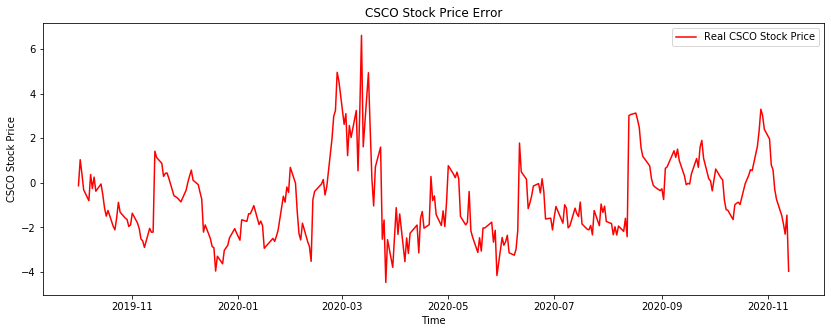

In [44]:
plt.figure(figsize=(14,5))
plt.plot(CSCO_data["Date"],CSCO_data["Error"], color = 'red', label = 'Real CSCO Stock Price')
plt.title('CSCO Stock Price Error')
plt.xlabel('Time')
plt.ylabel('CSCO Stock Price')
plt.legend()
plt.savefig('Error')

In [45]:
CSCO_data.to_csv("CSCO_Predicted_Data")

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator